In [7]:
"""
2-input XOR example -- this is most likely the simplest possible example.
"""

from __future__ import print_function
import os
import neat
import visualize


Starting

 ****** Running generation 0 ****** 

Population's average fitness: 2.19421 stdev: 0.37794
Best fitness: 2.99986 - size: (1, 2) - species 1 - id 114
Average adjusted fitness: 0.578
Mean genetic distance 1.319, standard deviation 0.469
Population of 150 members in 1 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1    0   150      3.0    0.578     0
Total extinctions: 0
Generation time: 0.032 sec

 ****** Running generation 1 ****** 

Population's average fitness: 2.34142 stdev: 0.32419
Best fitness: 2.99986 - size: (1, 2) - species 1 - id 114
Average adjusted fitness: 0.567
Mean genetic distance 1.254, standard deviation 0.435
Population of 150 members in 1 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1    1   150      3.0    0.567     1
Total extinctions: 0
Generation time: 0.025 sec (0.028 average)

 ****** Running generation 2 ****** 

Population's average fitness: 2.3646

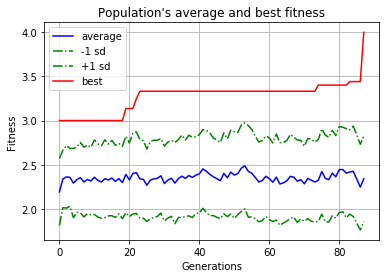

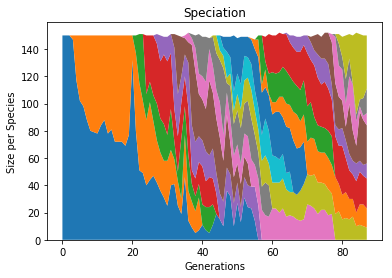

Mean genetic distance 1.853, standard deviation 0.745
Mean genetic distance 1.902, standard deviation 0.718
Mean genetic distance 1.861, standard deviation 0.747
Mean genetic distance 1.788, standard deviation 0.691
Mean genetic distance 1.928, standard deviation 0.642
Mean genetic distance 1.906, standard deviation 0.676
Mean genetic distance 1.909, standard deviation 0.629
Mean genetic distance 1.924, standard deviation 0.588
Mean genetic distance 1.845, standard deviation 0.601
Mean genetic distance 1.919, standard deviation 0.621
Done


In [8]:
# 2-input XOR inputs and expected outputs.
xor_inputs = [(0.0, 0.0), (0.0, 1.0), (1.0, 0.0), (1.0, 1.0)]
xor_outputs = [   (0.0,),     (1.0,),     (1.0,),     (0.0,)]


def eval_genomes(genomes, config):
    for genome_id, genome in genomes:
        genome.fitness = 4.0
        net = neat.nn.FeedForwardNetwork.create(genome, config)
        for xi, xo in zip(xor_inputs, xor_outputs):
            output = net.activate(xi)
            genome.fitness -= (output[0] - xo[0]) ** 2


def run(config_file):
    # Load configuration.
    config = neat.Config(neat.DefaultGenome, neat.DefaultReproduction,
                         neat.DefaultSpeciesSet, neat.DefaultStagnation,
                         config_file)

    # Create the population, which is the top-level object for a NEAT run.
    p = neat.Population(config)

    # Add a stdout reporter to show progress in the terminal.
    p.add_reporter(neat.StdOutReporter(True))
    stats = neat.StatisticsReporter()
    p.add_reporter(stats)
    p.add_reporter(neat.Checkpointer(5))

    # Run for up to 300 generations.
    winner = p.run(eval_genomes, 300)

    # Display the winning genome.
    print('\nBest genome:\n{!s}'.format(winner))

    # Show output of the most fit genome against training data.
    print('\nOutput:')
    winner_net = neat.nn.FeedForwardNetwork.create(winner, config)
    for xi, xo in zip(xor_inputs, xor_outputs):
        output = winner_net.activate(xi)
        print("input {!r}, expected output {!r}, got {!r}".format(xi, xo, output))

    node_names = {-1:'A', -2: 'B', 0:'A XOR B'}
    visualize.draw_net(config, winner, True, node_names=node_names)
    visualize.plot_stats(stats, ylog=False, view=True)
    visualize.plot_species(stats, view=True)

    p = neat.Checkpointer.restore_checkpoint('neat-checkpoint-4')
    p.run(eval_genomes, 10)


if __name__ == '__main__':
    # Determine path to configuration file. This path manipulation is
    # here so that the script will run successfully regardless of the
    # current working directory.
    print("Starting")
    local_dir = os.path.dirname("./")
    config_path = os.path.join(local_dir, 'config-feedforward')
    run(config_path)
    print("Done")